# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\DEVESH\Downloads\archive (2)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [8]:
model_path =r"C:\Users\DEVESH\AppData\Local\Temp\e5340b4f-19d0-4eb3-9260-98ac9b753de2_machineLearning-main.zip.de2\machineLearning-main\Plant_Disease_Prediction\trained_plant_disease_model1.keras"
cnn = tf.keras.models.load_model(model_path)

#Visualising and Performing Prediction on Single image

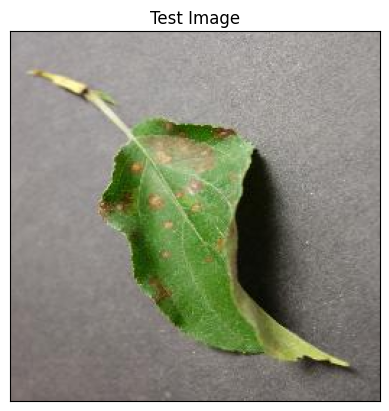

In [18]:
#Test Image Visualization
import cv2
image_path = r"C:\Users\DEVESH\Downloads\archive (2)\test\test\AppleCedarRust3.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
if img is None:
    raise ValueError(f"Image could not be loaded from path: {image_path}")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [19]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [20]:
print(predictions)

[[4.9855009e-07 3.0266781e-07 9.9578661e-01 1.4152431e-07 1.3729644e-03
  2.8163400e-03 2.3417245e-08 2.8109577e-07 1.4374258e-09 8.5345189e-09
  2.9221030e-09 9.7348192e-09 1.0720276e-08 6.6281786e-10 2.2500384e-09
  2.2695606e-06 9.6959604e-07 4.4383996e-06 7.0292361e-07 1.3059883e-05
  4.1001589e-09 3.4768490e-08 4.2775525e-08 4.2099334e-08 7.9674383e-09
  6.2825021e-09 1.4853483e-08 4.4043727e-08 1.8798994e-08 7.4674944e-08
  2.9176229e-07 2.1692149e-07 4.2363542e-08 1.5589462e-08 1.3745921e-07
  1.5568633e-08 4.0387908e-07 2.4881736e-08]]


In [21]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


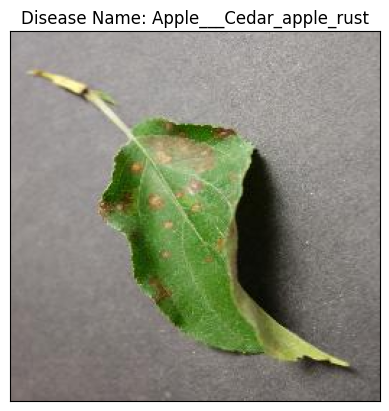

In [22]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [86]:
import pandas as pd
import tensorflow as tf


In [79]:
remedy_df = pd.read_csv(r"C:\Users\DEVESH\Desktop\remedydev.csv")

In [84]:
remedy_dict = pd.Series(remedy_df['remedy'].values, index=remedy_df['disease_name']).to_dict()


In [88]:
cnn = tf.keras.models.load_model('trained_plant_disease_model1.keras')

In [92]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\DEVESH\Downloads\archive (2)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear"
)


Found 17572 files belonging to 38 classes.


In [93]:

predictions = cnn.predict(validation_set)




550/550 ━━━━━━━━━━━━━━━━━━━━ 37s 67ms/step


In [94]:
predicted_classes = tf.argmax(predictions, axis=1).numpy()


In [95]:
class_names = validation_set.class_names


In [96]:
predicted_class_names = [class_names[idx] for idx in predicted_classes]


In [97]:
predicted_remedies = [remedy_dict.get(class_name, 'No remedy found') for class_name in predicted_class_names]

In [98]:
for class_name, remedy in zip(predicted_class_names, predicted_remedies):
    print(f"Disease Class: {class_name}, Remedy: {remedy}")

Disease Class: Potato___Late_blight, Remedy: No remedy found
Disease Class: Strawberry___Leaf_scorch, Remedy: No remedy found
Disease Class: Tomato___Septoria_leaf_spot, Remedy: No remedy found
Disease Class: Corn_(maize)___Common_rust_, Remedy: No remedy found
Disease Class: Apple___Apple_scab, Remedy: No remedy found
Disease Class: Cherry_(including_sour)___Powdery_mildew, Remedy: No remedy found
Disease Class: Tomato___Bacterial_spot, Remedy: No remedy found
Disease Class: Tomato___Late_blight, Remedy: No remedy found
Disease Class: Peach___Bacterial_spot, Remedy: No remedy found
Disease Class: Cherry_(including_sour)___healthy, Remedy: No remedy found
Disease Class: Apple___Apple_scab, Remedy: No remedy found
Disease Class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Remedy: No remedy found
Disease Class: Potato___healthy, Remedy: No remedy found
Disease Class: Strawberry___healthy, Remedy: No remedy found
Disease Class: Squash___Powdery_mildew, Remedy: No remedy found
Disease Clas